## IBM HR Employee Attrition Data

For this project, I wanted to find a dataset that was around the size of what we have used in this class, and might have a practical impact. This dataset I downloaded from Kaggle (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download) has 1470 entries and 35 attirbutes, which is a great size for this type of project.

My GitHub Repository is here: https://github.com/benperson3/EmployeeAttritionStudy

This data (which I read online is not actual data, but is fabricated) has details about employees at a large company. There are many purposes or ideas that could be gathered from this set, but the purpose of it is to study employee attrition, whether an employee will leave a company. This could be very valuable, especially if the company has had issues with losing some of their workers. Good employees are expensive to replace, so our goal will be to make a model that can be used predict which employees a company might loose, and that can empower leadership to take action on this.
#copy data frame
#categorical variables
#building training data frame
#everything with logistic regression


In [14]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
#from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import math

In [2]:
# read in CSV of data file and look at the first 5 rows
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


I will be using the homework from the course as a guide, so I will be starting with week 1, which covers examining, cleaning, and simple regression.

In [3]:
#check out data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We're fortunate that we have no issues with null-values which will save us some steps.
From this list, I see that 26 columns are integers, but 9 are some sort for string, and I want to see the options for those.

In [4]:
# print out possibilities for object variables
for i in ["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", 
          "MaritalStatus", "Over18", "OverTime"]:
    print(i, ": ", set(df[i]))

Attrition :  {'Yes', 'No'}
BusinessTravel :  {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Department :  {'Human Resources', 'Sales', 'Research & Development'}
EducationField :  {'Human Resources', 'Marketing', 'Medical', 'Life Sciences', 'Other', 'Technical Degree'}
Gender :  {'Male', 'Female'}
JobRole :  {'Healthcare Representative', 'Sales Executive', 'Human Resources', 'Sales Representative', 'Research Director', 'Research Scientist', 'Manufacturing Director', 'Laboratory Technician', 'Manager'}
MaritalStatus :  {'Divorced', 'Married', 'Single'}
Over18 :  {'Y'}
OverTime :  {'Yes', 'No'}


I see that the "Over18" column only has one entry, so it's not necessary. We'll remove it. We'll also change these from strings to factors for our analysis.

In [5]:
# change features to categories
df2 = df.drop(['Over18'], axis=1)
for i in ["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", 
          "MaritalStatus", "OverTime"]:
    df2[i] = df2[i].astype('category')

Lastly, we want to look at some of these numeric attributes to get an idea of the range that we have.

Age : {min: 18 , max: 60 }


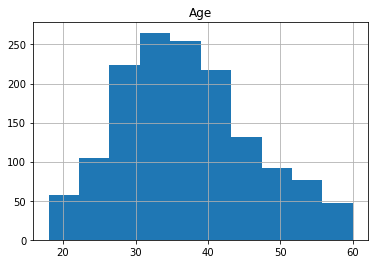

DailyRate : {min: 102 , max: 1499 }


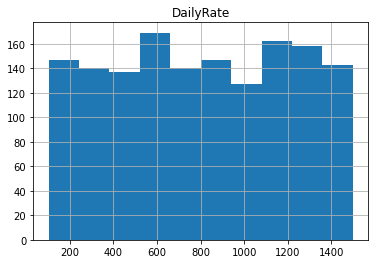

DistanceFromHome : {min: 1 , max: 29 }


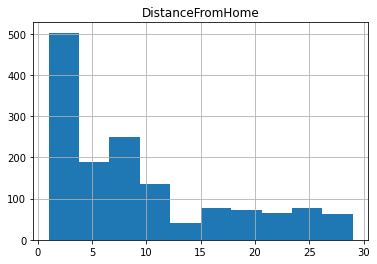

Education : {min: 1 , max: 5 }


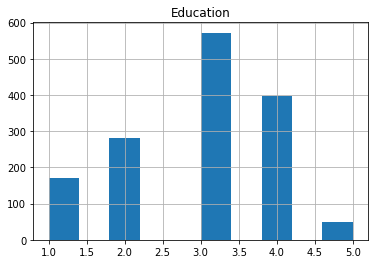

EnvironmentSatisfaction : {min: 1 , max: 4 }


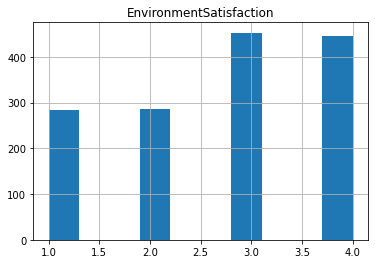

HourlyRate : {min: 30 , max: 100 }


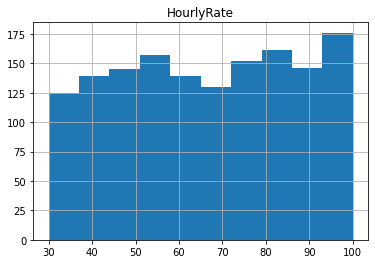

JobInvolvement : {min: 1 , max: 4 }


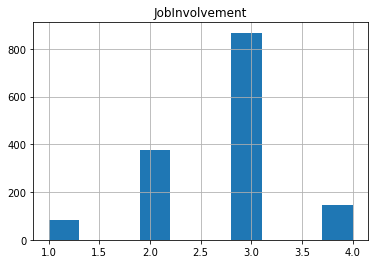

JobLevel : {min: 1 , max: 5 }


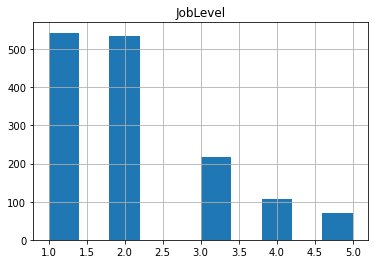

JobSatisfaction : {min: 1 , max: 4 }


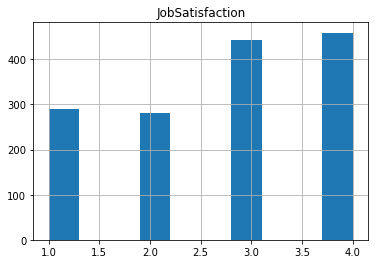

NumCompaniesWorked : {min: 0 , max: 9 }


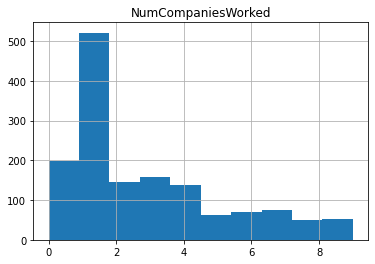

PercentSalaryHike : {min: 11 , max: 25 }


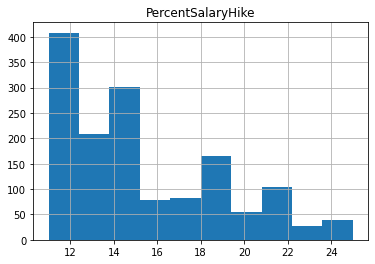

PerformanceRating : {min: 3 , max: 4 }


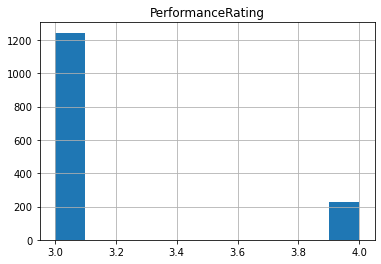

StockOptionLevel : {min: 0 , max: 3 }


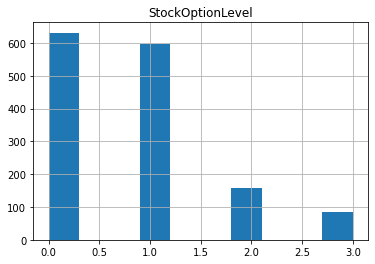

TotalWorkingYears : {min: 0 , max: 40 }


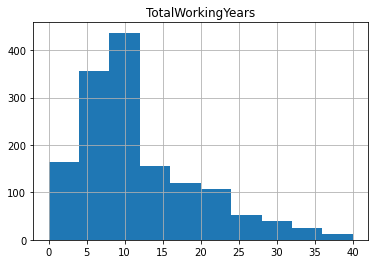

WorkLifeBalance : {min: 1 , max: 4 }


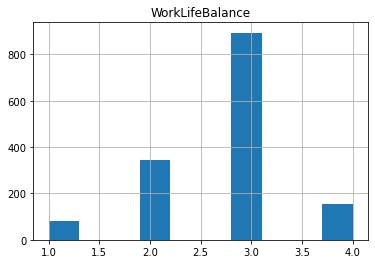

YearsWithCurrManager : {min: 0 , max: 17 }


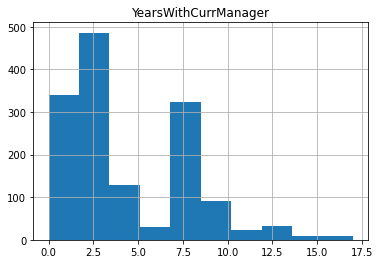

EmployeeCount : {min: 1 , max: 1 }


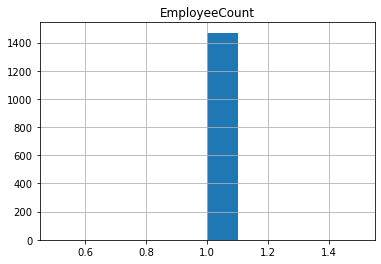

StandardHours : {min: 80 , max: 80 }


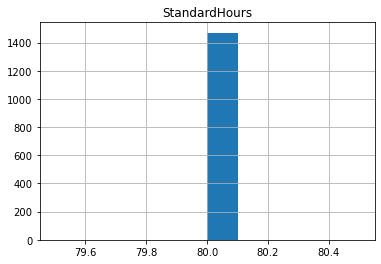

In [6]:
# look at some of the statistics for some of the numerical features
for i in ["Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate",
          "JobInvolvement", "JobLevel", "JobSatisfaction", "NumCompaniesWorked", 
          "PercentSalaryHike", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears",
          "WorkLifeBalance", "YearsWithCurrManager", "EmployeeCount", "StandardHours"]:
    print(i, ": {min:", min(df2[i]), ", max:", max(df2[i]), "}")
    df2[i].hist()
    plt.title(i)
    plt.show()

Employee Count and Standard Hours only have one value, I'm just going to remove them.
Many of these fields are on a 1 to 5 scale, and I've considered whether I want my models to treat those as integers or as factors for analysis. I decided to keep those are integers.

We see that some of the attriubes are continuous variables (or similar), and some are on a categorical scale, such as 1 to 5. Now that we're done with examining and transforming our data, I'm going to save it as a new data frame for clarity

In [7]:
df3 = df2.drop(['EmployeeCount', 'StandardHours'], axis=1)
attrition = df3

## Simple Logistic Regression

Now we're moving towards a simple logistic regression. We'll take a look at a correlation matrix for our data.

<AxesSubplot:title={'center':'Feature Correlation'}>

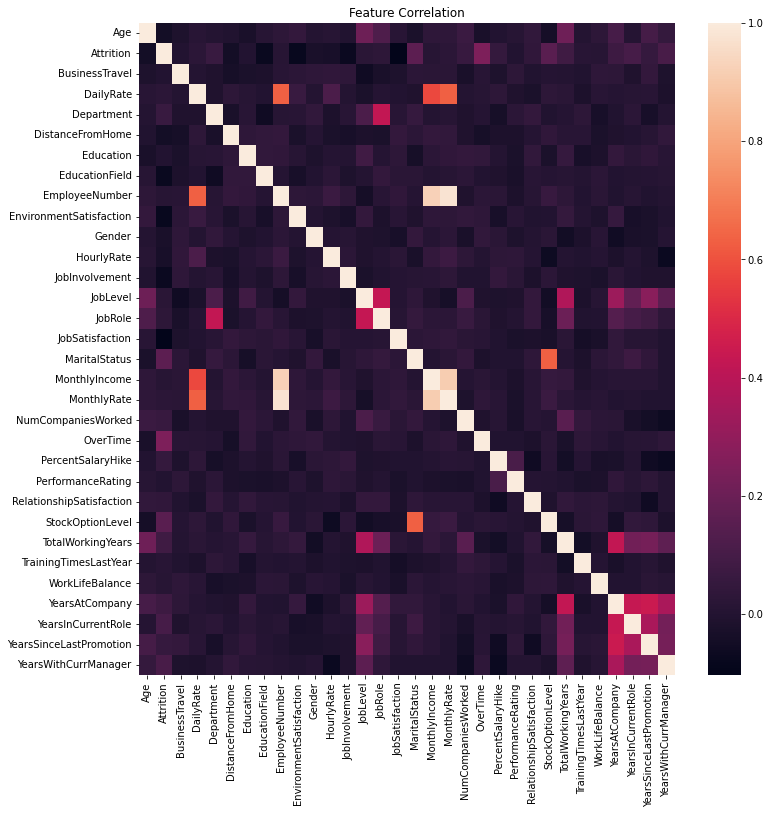

In [8]:
# look at correlation amongst the variables
corr = attrition.apply(lambda x: x.factorize()[0]).corr()
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Feature Correlation")
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

Visually, this does not look great for Attrition. I'm not seeing any features that have a strong correlation.

In [9]:
# see data values for correlation with Attrition
corr["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
StockOptionLevel            0.152572
YearsWithCurrManager        0.107512
YearsInCurrentRole          0.100870
TotalWorkingYears           0.078461
YearsAtCompany              0.075436
Department                  0.063991
NumCompaniesWorked          0.057814
YearsSinceLastPromotion     0.052811
PercentSalaryHike           0.048259
RelationshipSatisfaction    0.037298
JobRole                     0.027930
DailyRate                   0.025295
MonthlyRate                 0.021906
JobLevel                    0.019458
TrainingTimesLastYear       0.014942
WorkLifeBalance             0.012169
EmployeeNumber              0.010369
MonthlyIncome               0.010361
BusinessTravel              0.000074
Education                  -0.001002
PerformanceRating          -0.002889
Gender                     -0.029453
HourlyRate                 -0.030396
DistanceFromHome           -0.043426
A

Let's take our best guess at 5 parameters for a starting model. I'm going to use "OverTime", "MaritalStatus", "StockOptionLevel", "YearsWithCurrManger", and "JobSatisfaction"

In [10]:
# create dummy variables for categories
attritionX = pd.get_dummies(data=attrition, drop_first=True)

# make test train split
attrition.x_train, attrition.x_test, attrition.y_train, attrition.y_test = train_test_split(
    attritionX.drop('Attrition_Yes', axis = 1), attritionX['Attrition_Yes'], test_size = 0.2
    )

attrition.x_train_lr, attrition.x_test_lr = attrition.x_train[['OverTime_Yes', 'MaritalStatus_Married',
                'MaritalStatus_Single', 'StockOptionLevel', 'YearsWithCurrManager', 
                'JobSatisfaction']], attrition.x_test[['OverTime_Yes', 'MaritalStatus_Married',
                'MaritalStatus_Single', 'StockOptionLevel', 'YearsWithCurrManager', 'JobSatisfaction']]

# create and fit regression
mod_LogReg = LogisticRegression()
mod_LogReg.fit(attrition.x_train_lr, attrition.y_train)

# print out coefficients
pd.DataFrame(mod_LogReg.coef_.reshape(-1,1), attrition.x_train_lr.columns, columns=['Coefficient'])

/var/folders/8g/sl1y903151z6d44bh4jxcln40000gn/T/ipykernel_1838/562401351.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  attrition.x_train, attrition.x_test, attrition.y_train, attrition.y_test = train_test_split(
/var/folders/8g/sl1y903151z6d44bh4jxcln40000gn/T/ipykernel_1838/562401351.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  attrition.x_train_lr, attrition.x_test_lr = attrition.x_train[['OverTime_Yes', 'MaritalStatus_Married',


,Coefficient
OverTime_Yes,1.346661
MaritalStatus_Married,0.265490
MaritalStatus_Single,1.078195
StockOptionLevel,-0.160630
YearsWithCurrManager,-0.162489
JobSatisfaction,-0.292773


We have some preliminary results from our model. What do we see here? We see that the highest magnititude relationships are those with Overtime (increases), and those who are single (increases). People who work overtime and are single are much more likely to leave. Married and Divorced people are almost equally likely.

We also see that as job satisfaction increases, employees are less likely to leave, which makes sense.

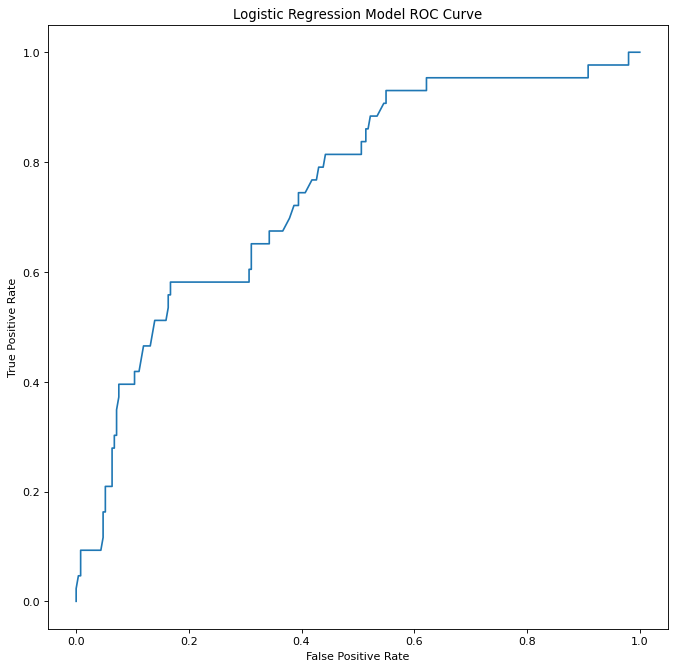

The AUC score is:  0.7499305105160753


In [32]:
# find roc curve
yhat = mod_LogReg.predict_proba(attrition.x_test_lr)[::,1]

fpr, tpr, thresholds = roc_curve(attrition.y_test,  yhat)

figure(figsize = (10, 10), dpi = 80)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression Model ROC Curve')
plt.show()

auc = roc_auc_score(attrition.y_test, yhat)
print("The AUC score is: ", auc)

This is not ideal. A good logisitic regression has the maximum possible area under the curve. Our model has a score of 0.75, which might be helpful, but most of the model's we used in this course were more successful than that.

## Random Forest

Now that we've done a Logistical Regression, we should explore other ways of modeling and predicting with this data. Another method I found very interesting during the course was the random forest method, and so I want to try something like that out on this data. Note that a lot of this code will be copied from Module 5.

Random Forest Method
We'll start by building a class for this, using what we've made before.

In [40]:
class RandomForest():
    
    def __init__(self, x, y, sample_sz, n_trees=200, n_features='sqrt', max_depth=10, min_samples_leaf=5):
        """
        Create a new random forest classifier.
        
        Args:
            x : Input Feature vector
            y : Corresponding Labels
            sample_sz : Sample size
            n_trees : Number of trees to ensemble
            n_features : Method to select subset of features 
            max_depth : Maximum depth of the trees in the ensemble
            min_sample_leaf : Minimum number of samples per leaf 
        """
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        print("Features: ", self.n_features, "Training size: ", x.shape[1])  
        self.features_set = []
        self.x, self.y, self.sample_sz, self.max_depth, self.min_samples_leaf  = x, y, sample_sz, max_depth, min_samples_leaf
        self.trees = [self.create_tree(i) for i in range(n_trees)]

    def create_tree(self,i):
        """
        create a single decision tree classifier
        """
        
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        idxs = np.asarray(idxs)

        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        f_idxs = np.asarray(f_idxs)
        
        if i==0:
            self.features_set = np.array(f_idxs, ndmin=2)
        else:
            self.features_set = np.append(self.features_set, np.array(f_idxs,ndmin=2),axis=0)
        
        clf = DecisionTreeClassifier(max_depth = self.max_depth, min_samples_leaf = self.min_samples_leaf)
        clf.fit(self.x.iloc[idxs].iloc[:,self.features_set[i]], self.y.iloc[idxs])
        
        return clf
       
    def predict(self, x):
        
        """
        find average prediction across all trees for each x
        """
        
        yhat = []
        
        for i in range(x.shape[0]):
            preds = []
            for j in range(len(self.trees)):
                xi = x.iloc[[i]].iloc[:,self.features_set[j]]
                preds += self.trees[j].predict(xi).tolist()
                
            yhat += [max(set(preds), key=preds.count)]
                
        return yhat
    
    def score(self, X, y):
        """
        calculate score of current model based on a test_set
        """
        
        yhat = self.predict(X)
        
        return sum(1 for x, y in zip(yhat, y) if x == y) / len(yhat)


In [42]:
mod_forest = RandomForest(attrition.x_train, attrition.y_train, sample_sz=50)
score_forest = mod_forest.score(attrition.x_test, attrition.y_test)
print("The random forest score is: ", score_forest)

Features:  6 Training size:  45
The random forest score is:  0.8537414965986394


## Support Vector Machine

We've now used a second type of model to work with this data. Before we conclude what we know and decide the value of this project, I would like to try using a Support Vector Machine. Since we have two categories for attrition, this is a perfect scenario to determine if we can find a bondary for this. This is very clear to create once we're familiar with this data structure, so it was easy for me to build.

In [44]:
mod_svc = SVC(kernel = "rbf", C = 1, gamma = 1).fit(attrition.x_train, attrition.y_train)
scores = cross_val_score(mod_svc, attrition.x_test, attrition.y_test)
print(sum(scores)/len(scores))

0.853769725306838


## Conclusion

From working through this project, I realized how I would be able to appy skills from this class to a real-world scenario. I applied clearning, data exploration, regression modeling, and machine learning models to predict whether employees may leave from a company. I was familiar with how to apply regression modeling before this class, so it was very valuable for me to continue to use that skill, and see how it compare to some of my new machine learning modeling abilities. I saw that both of my models had similar accuracy, while they may be valueable, it is important to note that 85% may be below a helpful score for some applications.

I think there's very interesting potential going forward with this, as I discuss in my presentation video. We'll want to look closely at the limitations of this model before we try to apply it, and we'll want to be careful about what we can conclude about employees, and how this knowledge is used. Like most data science work, ethics are very important to consider, so I didn't want to finish without mentioning that. My hope would be that a model like this could be useful for a company to help support employees who might not satisfied in their current job, and enable a healthier workplace.